In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("\\Users\\rosha\\Desktop\\UM Internship\\250k Medicines Usage, Side Effects and Substitutes\\250k Medicines Usage, Side Effects and Substitutes.csv")
print(df.columns)

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'sideEffect3', 'sideEffect4', 'sideEffect5',
       'sideEffect6', 'sideEffect7', 'sideEffect8', 'sideEffect9',
       'sideEffect10', 'sideEffect11', 'sideEffect12', 'sideEffect13',
       'sideEffect14', 'sideEffect15', 'sideEffect16', 'sideEffect17',
       'sideEffect18', 'sideEffect19', 'sideEffect20', 'sideEffect21',
       'sideEffect22', 'sideEffect23', 'sideEffect24', 'sideEffect25',
       'sideEffect26', 'sideEffect27', 'sideEffect28', 'sideEffect29',
       'sideEffect30', 'sideEffect31', 'sideEffect32', 'sideEffect33',
       'sideEffect34', 'sideEffect35', 'sideEffect36', 'sideEffect37',
       'sideEffect38', 'sideEffect39', 'sideEffect40', 'sideEffect41', 'use0',
       'use1', 'use2', 'use3', 'use4', 'Chemical Class', 'Habit Forming',
       'Therapeutic Class', 'Action Class'],
      dtype='object')


C:\Users\rosha\AppData\Local\Temp\ipykernel_12076\307424600.py:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("\\Users\\rosha\\Desktop\\UM Internship\\250k Medicines Usage, Side Effects and Substitutes\\250k Medicines Usage, Side Effects and Substitutes.csv")


In [3]:
#exploring dataset
df.head()

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

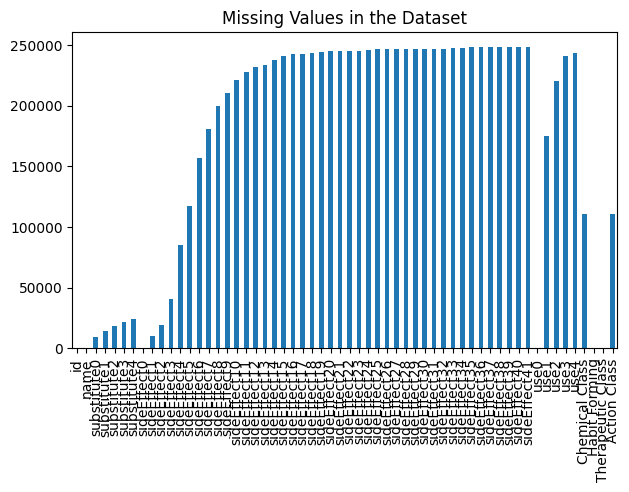

In [5]:
#Check if there is any missing values in the dataset
df.isna().sum().plot(kind='bar')
plt.tight_layout()
plt.title('Missing Values in the Dataset')

plt.show()

We can see, here the dataset has a lot of missing values. Therefore, we will calculate the 5% value of dataset and the col that have missing values more than 5% will be dropped

In [6]:
#Calculate the 5% values of dataset
threshold= len(df)* 0.05
print(threshold)

12410.900000000001


In [7]:
#Cols that have more than or equal with 5% missing values
cols_drop= df.columns[df.isna().sum()>= threshold]
print(cols_drop)

Index(['substitute1', 'substitute2', 'substitute3', 'substitute4',
       'sideEffect2', 'sideEffect3', 'sideEffect4', 'sideEffect5',
       'sideEffect6', 'sideEffect7', 'sideEffect8', 'sideEffect9',
       'sideEffect10', 'sideEffect11', 'sideEffect12', 'sideEffect13',
       'sideEffect14', 'sideEffect15', 'sideEffect16', 'sideEffect17',
       'sideEffect18', 'sideEffect19', 'sideEffect20', 'sideEffect21',
       'sideEffect22', 'sideEffect23', 'sideEffect24', 'sideEffect25',
       'sideEffect26', 'sideEffect27', 'sideEffect28', 'sideEffect29',
       'sideEffect30', 'sideEffect31', 'sideEffect32', 'sideEffect33',
       'sideEffect34', 'sideEffect35', 'sideEffect36', 'sideEffect37',
       'sideEffect38', 'sideEffect39', 'sideEffect40', 'sideEffect41', 'use1',
       'use2', 'use3', 'use4', 'Chemical Class', 'Action Class'],
      dtype='object')


In [8]:
#Cols that have less than 5% missing value
cols_with_missingval= df.columns[df.isna().sum() < threshold]
print(cols_with_missingval)


Index(['id', 'name', 'substitute0', 'sideEffect0', 'sideEffect1', 'use0',
       'Habit Forming', 'Therapeutic Class'],
      dtype='object')


To prevent any unclear information, we will use cols that have less than 5% of missing values for generate insight data. 


In [9]:
#Unique sideEffect
print(df['sideEffect0'].nunique())

326


There are 326 different type of side effects in this dataset

In [10]:
#Unique name
print(df['name'].nunique())

222825


In [11]:
#Unique treatment
print(df['use0'].nunique())

657


And 657 different treatments

In [12]:
#Explore the popular use
print(df['use0'].value_counts(dropna=False, ascending=False))

use0
Treatment of Bacterial infections                             39573
 Pain relief                                                  22783
Treatment of Type 2 diabetes mellitus                         11350
 Bacterial infections                                         11288
Treatment of Gastroesophageal reflux disease (Acid reflux)     9749
                                                              ...  
 Vision loss due to swelling of the macula                        1
Treatment of Thyroid cancer                                       1
Treatment of Cataract                                             1
Treatment of Invasive Aspergillosis                               1
 Severe acute pain                                                1
Name: count, Length: 657, dtype: int64


We can see here, that top 5 popular treatments are
- Bacterial infections
- Pain relief
- Diabetes mellitus
- Gastroesophageal reflux disease (Acid reflux)


C:\Users\rosha\AppData\Local\Temp\ipykernel_12076\1905094901.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count1 = df['use0'].str.contains('|'.join(Treatments), case=False).value_counts()


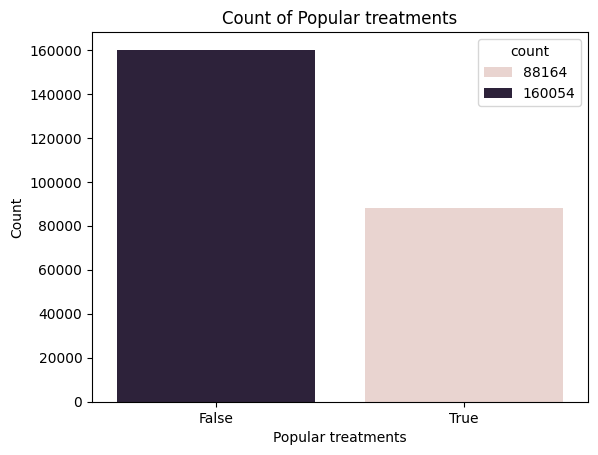

In [13]:
#Explore the distribution of use0 (treatments that popular)
Treatments =['Treatment of Bacterial infections','Bacterial infections','Pain relief','Treatment of Type 2 diabetes mellitus','Treatment of Gastroesophageal reflux disease(Acid reflux)']
count1 = df['use0'].str.contains('|'.join(Treatments), case=False).value_counts()

#Ploting
sns.barplot(x=count1.index, y=count1.values, hue=count1)

plt.xlabel('Popular treatments')
plt.ylabel('Count')
plt.title('Count of Popular treatments')
plt.show()

**The chart show here, indicate that, top 5 popular treatments that showed above have present more than 50% dataset**


In [14]:
#Explore the popular name
drug_name = df['name']
drug_name.value_counts(dropna=False, ascending=False)

name
ns 0.9% infusion                     13
meditrax s 1000mg/500mg injection     8
modace 100mg/500mg tablet             6
mucohelp 1gm injection                6
matchfix-cv 200mg/125mg tablet        6
                                     ..
etoxiflam 120mg tablet                1
etocrax 90mg tablet                   1
edikacin 500mg injection              1
eurotam 0.40mg tablet                 1
zyvocol 1% dusting powder             1
Name: count, Length: 222825, dtype: int64

The drugs named (ns 0.9% infusion and meditrax s 1000mg/500mg injection) have appear more than 5 time with 13 and 8. 

In [15]:
#Exploring the popular side effects
df["sideEffect0"].value_counts()

sideEffect0
Nausea                               68477
Diarrhea                             24253
Headache                             16841
Vomiting                             15031
Rash                                 11249
                                     ...  
Central nervous system depression        1
Breast enlargement                       1
Transient stinging                       1
Increased intraocular pressure           1
Acute toxicity                           1
Name: count, Length: 326, dtype: int64

Top 5 side effects that appear often in sideEffect0 according to the data are:
- Nausea       :                        68477
- Diarrhea      :                       24253
- Headache       :                      16841
- Vomiting     :                        15031
- Rash         :                        11249

C:\Users\rosha\AppData\Local\Temp\ipykernel_12076\2444378454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_series.index, y=count_series.values, palette='viridis')


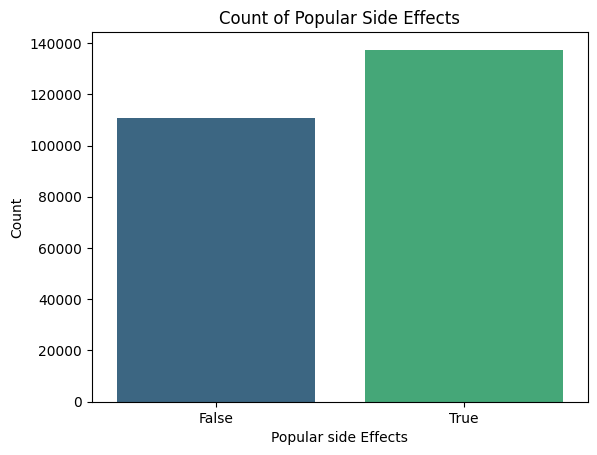

In [16]:
#Looking at top of popular side effect
side_effects =['Nausea', 'Diarrhea', 'Headache', 'Vomiting', 'Rash']
count_series = df['sideEffect0'].str.contains('|'.join(side_effects), case=False).value_counts()


#Ploting the popular side effects
sns.barplot(x=count_series.index, y=count_series.values, palette='viridis')

plt.xlabel('Popular side Effects')
plt.ylabel('Count')
plt.title('Count of Popular Side Effects')
plt.show()

use0
Treatment of Anxiety disorder                                                                 1284
 Moderate to severe pain                                                                       639
Treatment of Anxiety                                                                           549
 Pain relief                                                                                   309
Treatment of Insomnia                                                                          280
                                                                                              ... 
 Severe chronic pain Severe chronic pain                                                         1
Treatment of DepressionTreatment of DepressionTreatment of Depression                            1
 Common cold Common cold                                                                         1
 Anesthesia Anesthesia                                                                           1
Treat

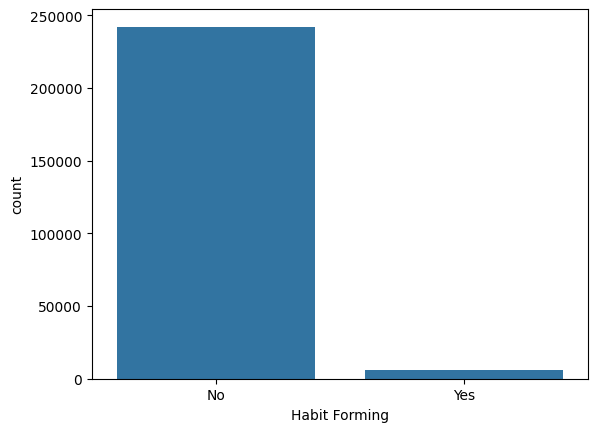

In [17]:
#Explore the relationship between medicine and habit forming
habit_forming = df[df["Habit Forming"] == "Yes"]
medicine_habit = habit_forming.groupby(['name', 'Habit Forming'])['use0'].sum()
medicine_habit.sort_index(ascending=False)
print(medicine_habit.value_counts())


#Plot
sns.countplot(x='Habit Forming', data=df)
plt.show()


Here, we can see top treatments that forming habit often fall into categories of:
* Treatment of Anxiety disorder            
* Moderate to severe pain                 
* Treatment of Anxiety                                                                           
* Pain relief                                                                                   
* Treatment of Insomnia 


In [18]:
#Percentage of medicines that forming habit
percentage = df['Habit Forming'].value_counts(normalize=True)*100
print(percentage)

Habit Forming
No     97.581561
Yes     2.418439
Name: proportion, dtype: float64


There are 2.4% type of medicine and treatments that can form habit, while 97.6% do not form habit

                                        id  \
Therapeutic Class Habit Forming              
CARDIAC           Yes              1128325   
GASTRO INTESTINAL Yes             30092649   
NEURO CNS         Yes            469182380   
PAIN ANALGESICS   Yes            180877162   
RESPIRATORY       Yes             55853745   

                                                                              name  \
Therapeutic Class Habit Forming                                                      
CARDIAC           Yes            mephentine 30mg injectionmephentine 15mg injec...   
GASTRO INTESTINAL Yes            aurinorm 5 mg/2.5 mg tabletabdocool tabletarwi...   
NEURO CNS         Yes            alprax 0.25 tabletalprax 0.5mg tabletamixide-h...   
PAIN ANALGESICS   Yes            acuvin tabletactidol-dp tabletaltram tabletact...   
RESPIRATORY       Yes            ativan 2mg tabletativan 1mg tabletascoril c  s...   

                                                                       sub

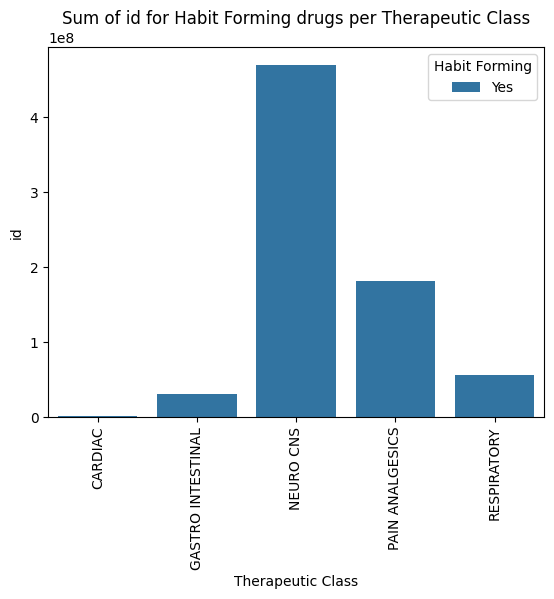

In [19]:
#Exloring the relationship between Therapeutic class and Habit forming
habit_forming = df[df["Habit Forming"] == "Yes"]
Therapeutic_habit= habit_forming.groupby(['Therapeutic Class', 'Habit Forming']).sum()
print(Therapeutic_habit)

# Reset the index of the DataFrame to move 'Therapeutic Class' and 'Habit Forming' back as columns
Therapeutic_habit = Therapeutic_habit.reset_index()

# Plot
sns.barplot(x='Therapeutic Class', y='id', hue='Habit Forming', data=Therapeutic_habit)
plt.xlabel('Therapeutic Class')
plt.title('Sum of id for Habit Forming drugs per Therapeutic Class')
plt.xticks(rotation=90)

plt.show()


**Looking at the graph, we can see that 'Neuro CNS' appears the most in creating habit. 